In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/60k-stack-overflow-questions-with-quality-rate/valid.csv
/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv')
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [4]:
df.columns

Index(['Id', 'Title', 'Body', 'Tags', 'CreationDate', 'Y'], dtype='object')

In [5]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            45000 non-null  int64 
 1   Title         45000 non-null  object
 2   Body          45000 non-null  object
 3   Tags          45000 non-null  object
 4   CreationDate  45000 non-null  object
 5   Y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [6]:
# Check for missing values
print(df.isnull().sum())

Id              0
Title           0
Body            0
Tags            0
CreationDate    0
Y               0
dtype: int64


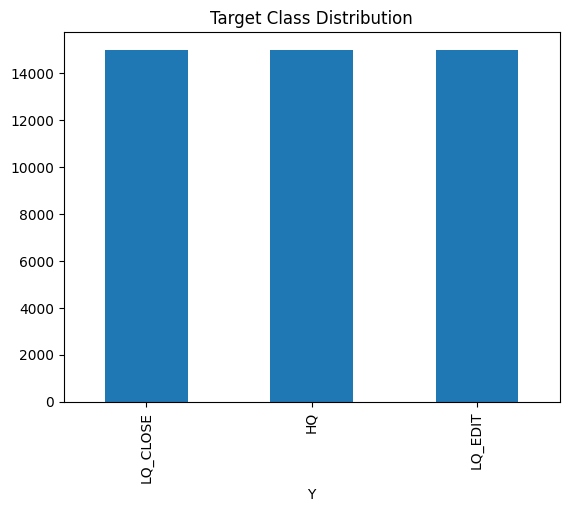

In [7]:
# Check target distribution
df['Y'].value_counts().plot(kind='bar', title='Target Class Distribution');

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Length of Title and Body
df['title_len'] = df['Title'].apply(len)
df['body_len'] = df['Body'].apply(len)

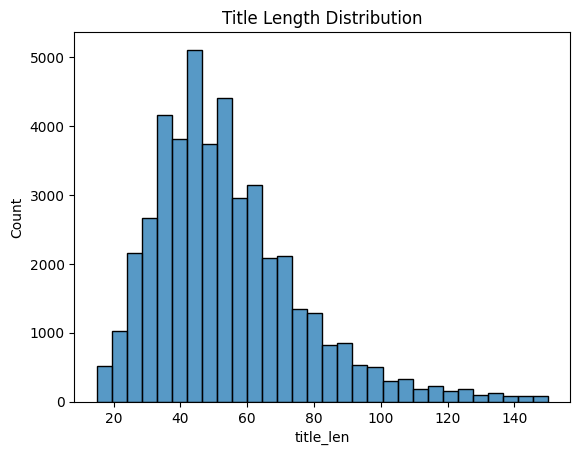

In [9]:
# Title length distribution
sns.histplot(df['title_len'], bins=30)
plt.title("Title Length Distribution")
plt.show()

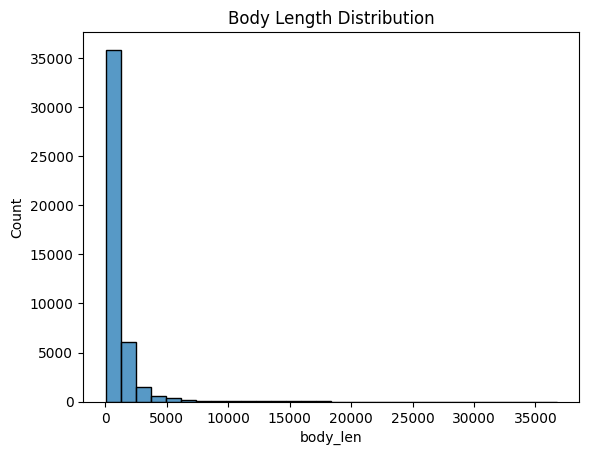

In [10]:
# Body length distribution
sns.histplot(df['body_len'], bins=30)
plt.title("Body Length Distribution")
plt.show()

In [11]:
# Combine text fields
df['text'] = df['Title'] + ' ' + df['Body'] + ' ' + df['Tags']

# Keep only text and target
data = df[['text', 'Y']].copy()

# Rename for clarity
data.columns = ['text', 'label']

In [12]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['label']

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          HQ       0.84      0.84      0.84      2965
    LQ_CLOSE       0.78      0.73      0.75      2981
     LQ_EDIT       0.83      0.89      0.86      3054

    accuracy                           0.82      9000
   macro avg       0.82      0.82      0.82      9000
weighted avg       0.82      0.82      0.82      9000



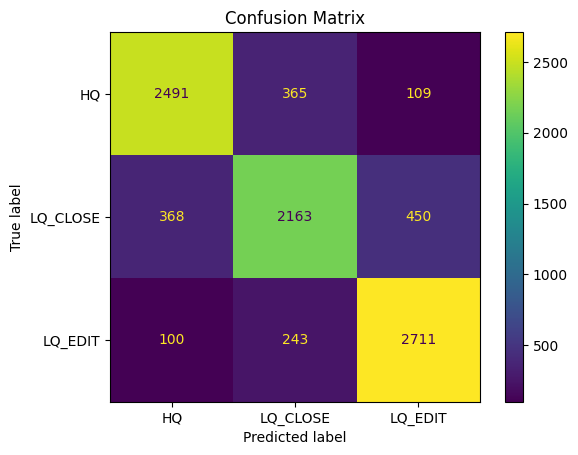

In [17]:
# Show confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Predict on 5 random examples
sample_preds = model.predict(X_test_tfidf[:5])
for i, text in enumerate(X_test[:5]):
    print(f"Text: {text[:100]}...\nPrediction: {sample_preds[i]}\n")

Text: not able to run function in php <p>I'am not able to run a function in php oops concept.
My data gets...
Prediction: LQ_CLOSE

Text: Export GIT LOG into an Excel file <p>I have looked into the forum, but with no luck.</p>

<p>Require...
Prediction: LQ_EDIT

Text: How to summarize the employees by net revenue and not order date? 8.	The sales director would like t...
Prediction: LQ_EDIT

Text: how to retrieve words based on user inputting letter from a TreeSet or TreeMap efficiently without d...
Prediction: LQ_CLOSE

...
Prediction: LQ_EDIT

